In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
!pip install xlrd
!pip install seaborn

mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
!ls

100k_song_pop_sample.xlsx
EDA.ipynb
Proposal Slides - CDS Geeks.pdf
Weekly Charts
a_level_artists.xlsx
alec_benjamin_example.csv
max popularity by track.csv
new Sep test tracks.csv
songs_and_playlist_names.csv
spotify_100k_sample.csv
spotify_audio_data.xlsx
spotify_competitor_tracks-updated_sep14.xlsx
spotify_daily_charts_sample.csv
spotify_playlist_100k_sample.csv
spotify_playlist_example.csv
weekly viral & top 200.csv


In [16]:
alec=pd.read_csv('alec_benjamin_example.csv')
songplay=pd.read_csv('songs_and_playlist_names.csv')
sample100=pd.read_csv('spotify_100k_sample.csv')
daily=pd.read_csv('spotify_daily_charts_sample.csv')
playsample100=pd.read_csv('spotify_playlist_100k_sample.csv')
playsample=pd.read_csv('spotify_playlist_example.csv')
pop100=pd.read_excel('100k_song_pop_sample.xlsx')
audio=pd.read_excel('spotify_audio_data.xlsx')

/Users/preetgandhi95/miniconda3/envs/nlpclass/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [128]:
alevel=pd.read_excel('a_level_artists.xlsx')
maxpop=pd.read_csv('max popularity by track.csv')
newsept=pd.read_csv('new Sep test tracks.csv')
spotcomp=pd.read_excel('spotify_competitor_tracks-updated_sep14.xlsx')
viralweek=pd.read_csv('weekly viral & top 200.csv')

In [44]:
maxpop.head()

,track_id,track_external_id,max_popularity
0,3iI3pi9bAFrDW74UxyzMJ0,DEC611100411,30
1,7FPXqN2DDiG5JASUjEi8Ua,ARG991022790,13
2,1SHeg1buNhS90Uak8gsx9A,ARW251100615,27
3,6b5rCLd1UslE8cU1pfk4d0,ATN261562301,39
4,3Q85163sbHgeXmnQUCbkQk,BEB018070417,5


In [22]:
maxpop.describe()

,track_id,track_external_id,max_popularity
count,2458710,2458710,2458710
unique,2457786,2097466,201
top,artist,NLF711403495,0
freq,38,43,217614


In [50]:
x=maxpop[maxpop['max_popularity']=='\\N']
y=maxpop[maxpop['max_popularity']!='\\N']

In [56]:
#ONLY 38 missing
len(x)

38

In [57]:
#Not missing
len(y)

2458672

In [82]:
#No Null
y[y['max_popularity']==None]

,track_id,track_external_id,max_popularity


In [96]:
a=y['max_popularity'].astype(int)

In [99]:
df=pd.DataFrame()
df[0]=a

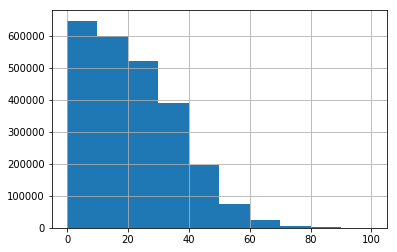

In [104]:
df[0].hist()

In [109]:
df[0].quantile(0.1)

1.0

In [110]:
df[0].quantile(0.2)

7.0

In [111]:
df[0].quantile(0.3)

11.0

In [112]:
df[0].quantile(0.4)

15.0

In [113]:
df[0].quantile(0.5)

19.0

In [114]:
df[0].quantile(0.6)

24.0

In [115]:
df[0].quantile(0.7)

29.0

In [116]:
df[0].quantile(0.8)

34.0

In [117]:
df[0].quantile(0.9)

42.0

In [118]:
df[0].quantile(0.95)

48.0

In [119]:
df[0].quantile(0.99)

61.0

In [167]:
df[0].quantile(0.9999)

92.0

In [121]:
df[0].quantile(1)

100.0

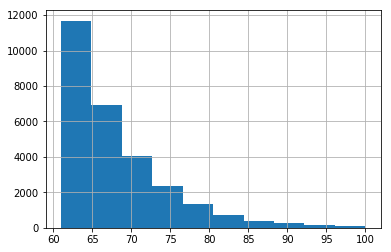

In [126]:
df[df[0]>60][0].hist()

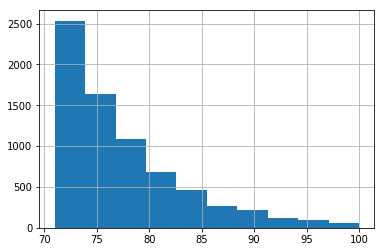

In [122]:
df[df[0]>70][0].hist()

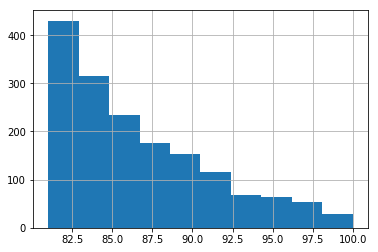

In [124]:
df[df[0]>80][0].hist()

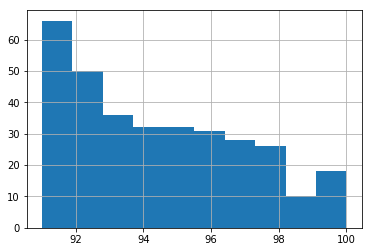

In [125]:
df[df[0]>90][0].hist()

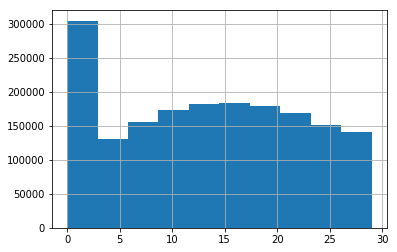

In [123]:
df[df[0]<30][0].hist()

In [181]:
alevel.head()

,artist_id,artist_name,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity,A_Level_Artist?,B_Level Artist?
0,3TVXtAsR1Inumwj472S9r4,Drake,263,255,39875,710070329,100,55.859119,1,0
1,6LuN9FCkKOj5PcnpouEgny,Khalid,46,56,13841,378377698,98,75.597498,0,1
2,3wyVrVrFCkukjdVIdirGVY,Lil Pump,34,32,6003,191866217,98,68.586418,0,1
3,1OAjDaKgg00KCUYqDe68un,Gigi D'Agostino,184,94,3243,130813283,97,64.911651,0,0
4,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,122,107,16642,299194507,97,68.611220,1,0


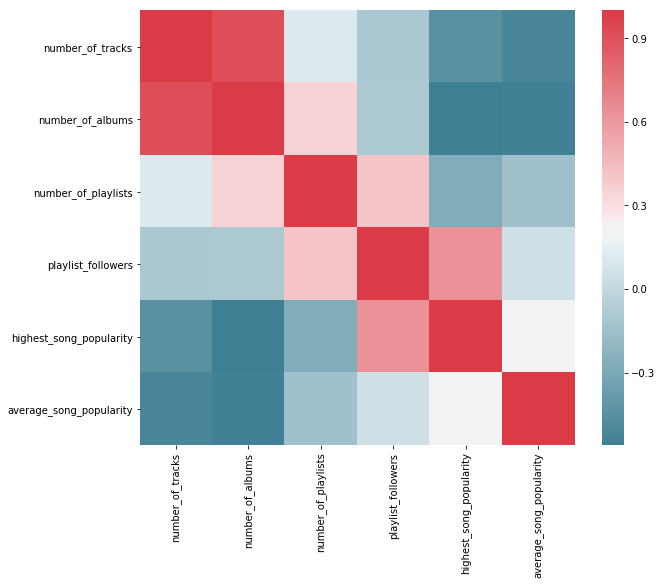

In [272]:
a=alevel[alevel['A_Level_Artist?']==1][['number_of_tracks','number_of_albums','number_of_playlists','playlist_followers','highest_song_popularity','average_song_popularity']]
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = a.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [184]:
a.describe()

,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity
count,18.000000,18.000000,18.000000,1.800000e+01,18.000000,18.000000
mean,223.388889,205.111111,22521.055556,2.934677e+08,89.500000,58.332260
std,160.045265,116.615451,7594.156062,1.235333e+08,5.721477,9.086263
min,53.000000,63.000000,13343.000000,2.000438e+08,80.000000,46.047163
25%,124.750000,136.250000,16708.750000,2.219057e+08,85.250000,51.570395
50%,197.000000,178.000000,22162.500000,2.433847e+08,89.000000,56.242040
75%,269.000000,238.250000,26176.500000,3.155812e+08,94.000000,66.637360
max,750.000000,570.000000,39875.000000,7.100703e+08,100.000000,75.759802


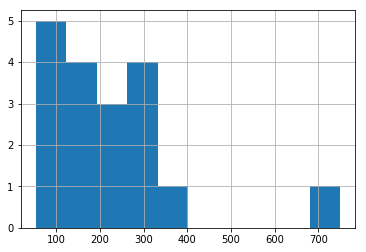

In [186]:
a['number_of_tracks'].hist()

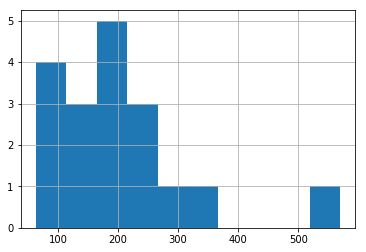

In [187]:
a['number_of_albums'].hist()

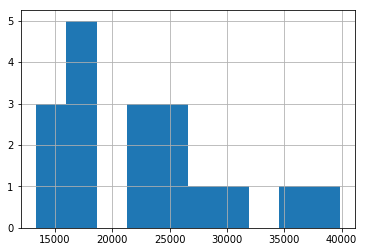

In [188]:
a['number_of_playlists'].hist()

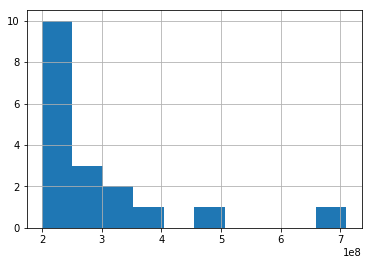

In [189]:
a['playlist_followers'].hist()

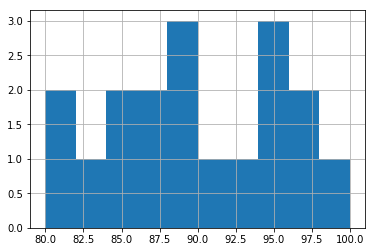

In [190]:
a['highest_song_popularity'].hist()

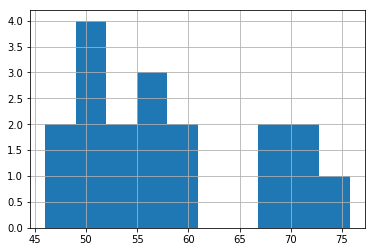

In [191]:
a['number_of_tracks'].hist()

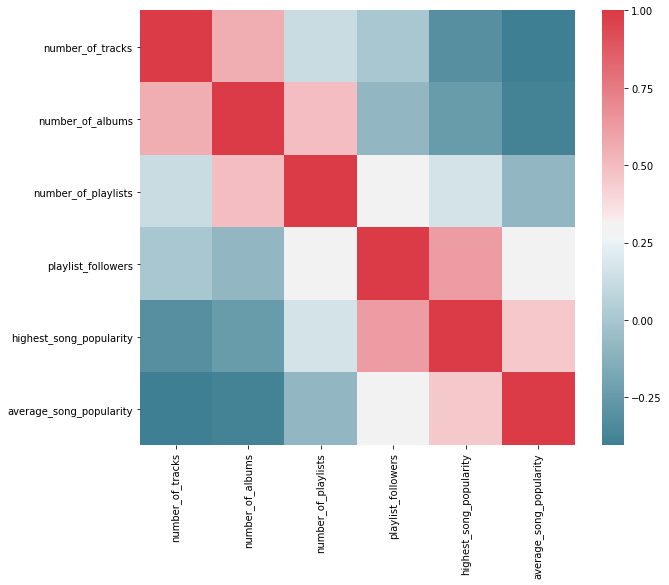

In [273]:
b=alevel[alevel['B_Level Artist?']==1][['number_of_tracks','number_of_albums','number_of_playlists','playlist_followers','highest_song_popularity','average_song_popularity']]
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = b.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [185]:
b.describe()

,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity
count,148.000000,148.000000,148.000000,1.480000e+02,148.000000,148.000000
mean,186.250000,131.108108,9692.324324,9.999183e+07,82.364865,54.896526
std,146.939475,87.585770,3925.651055,5.248502e+07,5.835790,8.100982
min,24.000000,27.000000,5036.000000,5.025929e+07,72.000000,40.699131
25%,88.750000,63.750000,6638.000000,6.639821e+07,78.000000,48.395561
50%,144.000000,109.500000,8890.500000,8.154981e+07,81.000000,54.027054
75%,238.750000,168.750000,11808.000000,1.175777e+08,85.000000,60.438639
max,802.000000,472.000000,23904.000000,3.783777e+08,98.000000,78.083978


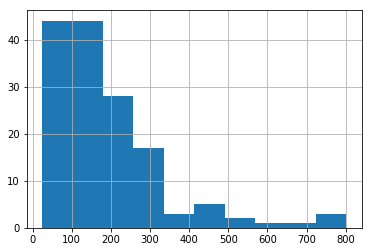

In [192]:
b['number_of_tracks'].hist()

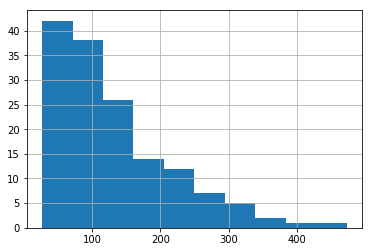

In [193]:
b['number_of_albums'].hist()

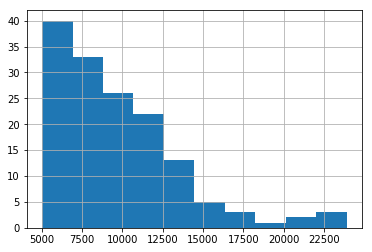

In [194]:
b['number_of_playlists'].hist()

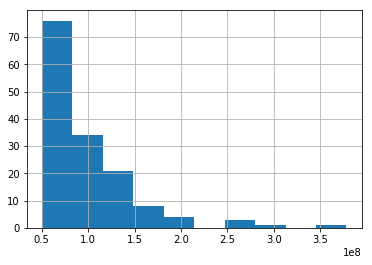

In [195]:
b['playlist_followers'].hist()

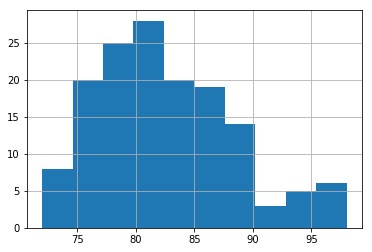

In [196]:
b['highest_song_popularity'].hist()

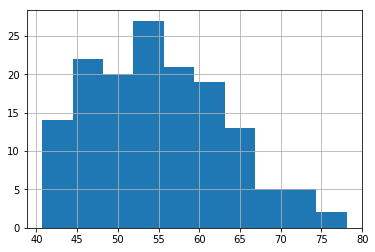

In [197]:
b['average_song_popularity'].hist()

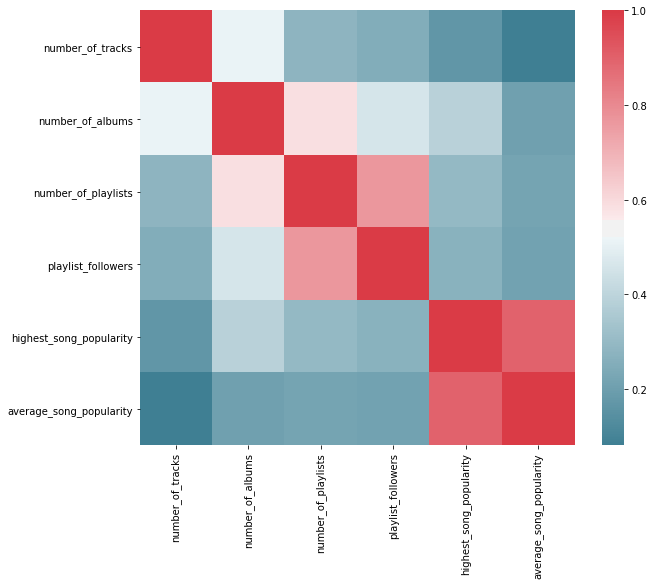

In [274]:
c=alevel[alevel['A_Level_Artist?']==0]
c=c[c['B_Level Artist?']==0]
c=c[['number_of_tracks','number_of_albums','number_of_playlists','playlist_followers','highest_song_popularity','average_song_popularity']]
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = c.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [204]:
c.describe()

,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity
count,484490.000000,484490.000000,484490.000000,4.844900e+05,484490.000000,484490.000000
mean,6.010035,3.327848,22.243733,1.822901e+05,17.191420,12.833218
std,41.755389,9.134368,175.794221,1.814708e+06,16.513406,12.829954
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,1.000000,6.800000e+02,2.000000,1.333333
50%,1.000000,1.000000,2.000000,2.943000e+03,13.000000,9.156250
75%,4.000000,3.000000,6.000000,1.795000e+04,29.000000,20.833333
max,24468.000000,2052.000000,17207.000000,2.004465e+08,97.000000,88.000000


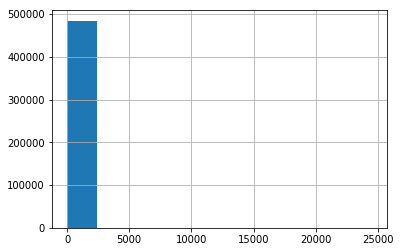

In [205]:
c['number_of_tracks'].hist()

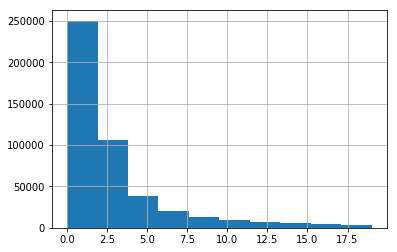

In [215]:
c[c['number_of_tracks']<20]['number_of_tracks'].hist()

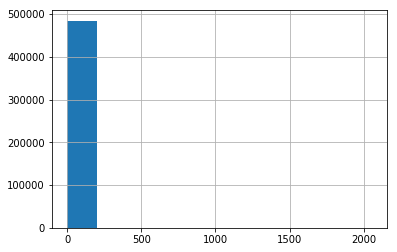

In [206]:
c['number_of_albums'].hist()

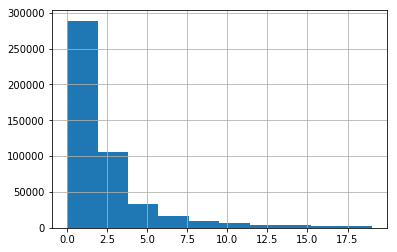

In [227]:
c[c['number_of_albums']<20]['number_of_albums'].hist()

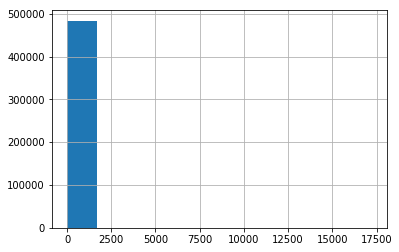

In [207]:
c['number_of_playlists'].hist()

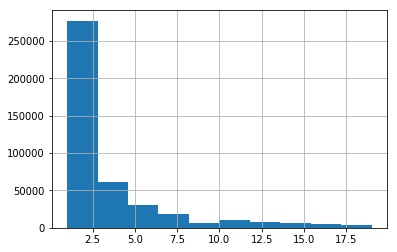

In [228]:
c[c['number_of_playlists']<20]['number_of_playlists'].hist()

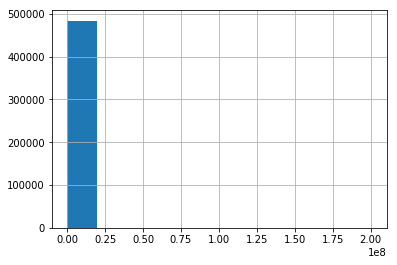

In [208]:
c['playlist_followers'].hist()

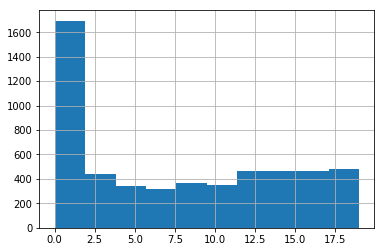

In [229]:
c[c['playlist_followers']<20]['playlist_followers'].hist()

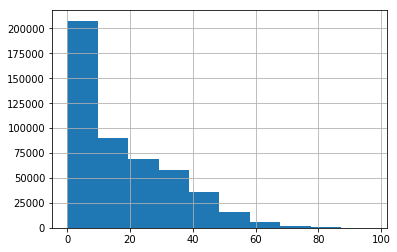

In [209]:
c['highest_song_popularity'].hist()

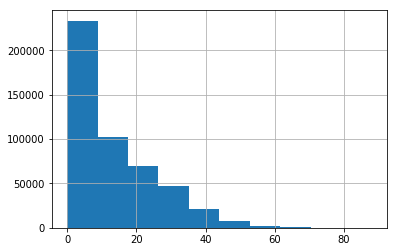

In [210]:
c['average_song_popularity'].hist()

In [231]:
newsept

,Unnamed: 0,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds
0,0,CA5KR1822869,3TpzJhNQkrRsXjhGohzDFT,Ghost Bike,Danny Kolk,123.988,0.6930,0.910,-6.977,0.4880,0.000291,0.0612,0.338000,11,0.6710,4,0,12.0,348461
1,1,GB8MX1800501,3JLckRYYF43OrZlYD2ug3V,Disturbing the Peace,ARLO,159.961,0.7960,0.605,-4.675,0.7210,0.068600,0.0509,0.000000,11,0.1210,4,1,22.0,189000
2,2,GBCBR1800052,4BajhAu1cfL1vgGxECLj8l,Take It All,The Magpie Salute,124.076,0.9390,0.315,-2.937,0.5690,0.005480,0.0640,0.000001,7,0.0371,4,1,25.0,204680
3,3,NLSB71800098,2CW42rwqjVOWpO8iptN3Mh,Let Me Live,FATHERDUDE,79.955,0.5650,0.786,-7.694,0.5780,0.006920,0.0952,0.000017,1,0.0315,4,0,27.0,196511
4,4,QZDA41848928,0UwqokN2BhA4EPv5uRNvmY,Rain,Kalih,120.010,0.4170,0.877,-11.433,0.0403,0.641000,0.0527,0.750000,1,0.1110,4,0,27.0,240741
5,5,QZDA41879966,5RJNDAZKnTHfzDnt9AzyxW,You a Flip,Antbeatz,95.993,0.6370,0.849,-7.129,0.5090,0.370000,0.0506,0.000000,9,0.0635,4,0,25.0,168254
6,6,ushm21822710,2wYSF0muLUsEC5pXrfkw5x,Andante,Piarelax,151.470,0.2400,0.431,-18.794,0.4060,0.994000,0.0414,0.953000,6,0.3490,4,1,10.0,59764
7,7,DEPX11800024,6L6Wyc5242Vh9y0svVIJ8U,Feel Okay - Lesko & Dutch Remix Edit,KALUMA,100.057,0.6760,0.747,-4.099,0.3260,0.029600,0.1220,0.000134,1,0.0752,4,0,13.0,166510
8,8,GBHAD1800945,6JfMquHFh0fb3XRmkkMcxP,Skyward,Habischman,123.005,0.8800,0.790,-6.035,0.7110,0.013400,0.0596,0.871000,1,0.0780,4,1,13.0,410368
9,9,QM6MZ1816824,1qkDNdWCXm5cehVwbpnFnc,Imagine - Instrumental,Ram Dass,120.152,0.1140,0.199,-24.746,0.0311,0.206000,0.0481,0.900000,0,0.0901,4,1,17.0,1740962


In [233]:
len(newsept['ARTIST'].unique())

21567

In [241]:
n=newsept[['TEMPO','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','SPEECHINESS','INSTRUMENTALNESS','KEY','TIME_SIGNATURE','MODE','POP','Seconds']]

In [270]:
n.describe()

,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,TIME_SIGNATURE,MODE,POP,Seconds
count,33087.000000,33087.00000,33087.000000,33087.000000,33087.000000,33087.000000,33087.000000,33087.000000,33087.000000,33087.00000,33087.000000,33087.000000,3.308700e+04
mean,121.579517,0.63425,0.617655,-8.556270,0.453545,0.261690,0.118708,0.208712,5.345725,3.92961,0.577840,23.995708,2.269261e+05
std,28.120945,0.23169,0.172638,4.784403,0.251116,0.300498,0.142484,0.344750,3.619382,0.41379,0.493911,14.923069,1.384725e+05
min,0.000000,0.00000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.959000e+03
25%,100.005000,0.48900,0.509000,-10.153500,0.247000,0.014400,0.039800,0.000000,2.000000,4.00000,0.000000,12.000000,1.774245e+05
50%,122.982000,0.66200,0.644000,-7.493000,0.440000,0.125000,0.059300,0.000219,6.000000,4.00000,1.000000,23.000000,2.095360e+05
75%,139.096500,0.81900,0.748000,-5.548500,0.649000,0.445000,0.135000,0.337000,9.000000,4.00000,1.000000,34.000000,2.513295e+05
max,247.781000,1.00000,0.988000,1.991000,0.998000,0.996000,0.968000,1.000000,11.000000,5.00000,1.000000,94.000000,5.669556e+06


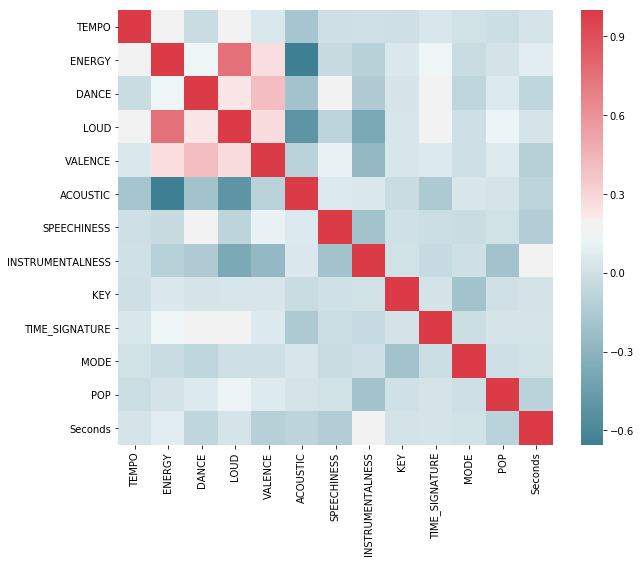

In [271]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = n.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

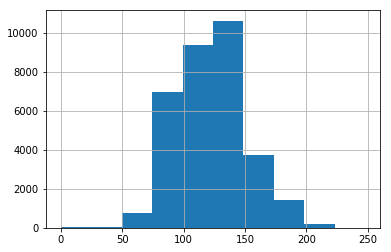

In [243]:
n['TEMPO'].hist()

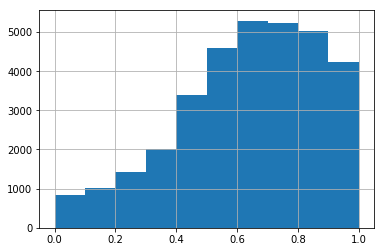

In [244]:
n['ENERGY'].hist()

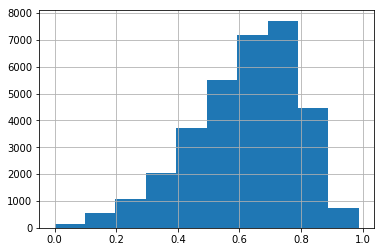

In [245]:
n['DANCE'].hist()

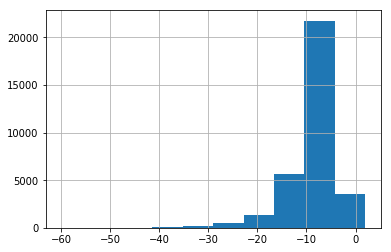

In [246]:
n['LOUD'].hist()

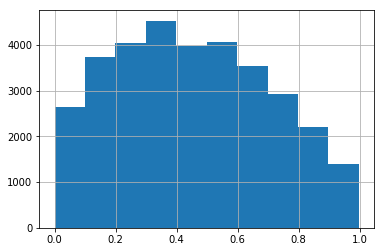

In [247]:
n['VALENCE'].hist()

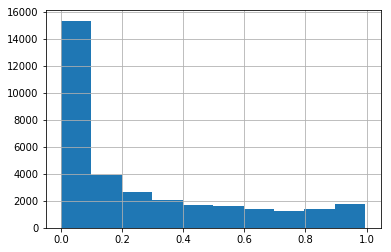

In [248]:
n['ACOUSTIC'].hist()

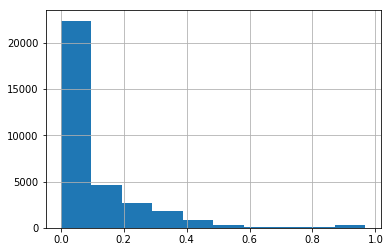

In [249]:
n['SPEECHINESS'].hist()

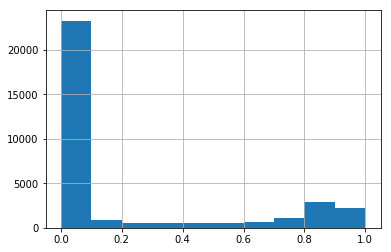

In [250]:
n['INSTRUMENTALNESS'].hist()

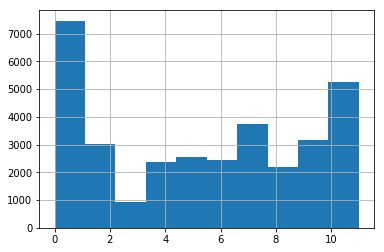

In [251]:
n['KEY'].hist()

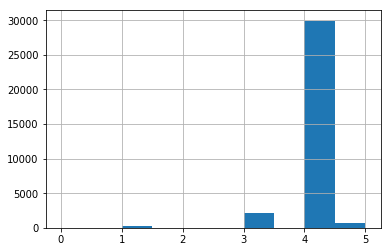

In [252]:
n['TIME_SIGNATURE'].hist()

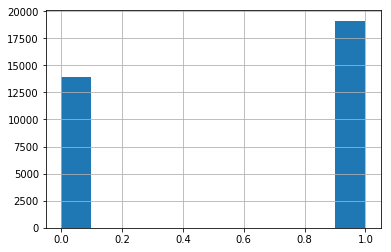

In [253]:
n['MODE'].hist()

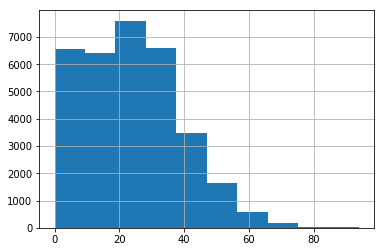

In [254]:
n['POP'].hist()  #POPULARITY SCORE

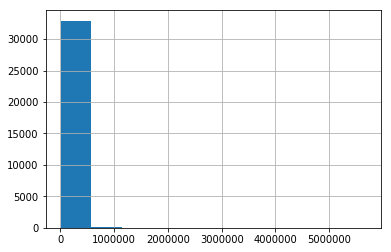

In [259]:
n['Seconds'].hist()

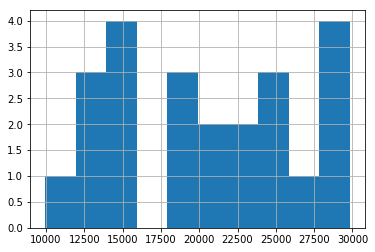

In [260]:
n[n['Seconds']<30000]['Seconds'].hist()

In [275]:
spotcomp

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
0,USCM51800207,0h1W19pS59KtEd7aDzF58i,In My Feelings,Drake,91.022,0.619000,0.833,-5.822,0.3660,0.049600,0.0971,0.000087,8,0.3000,4,1,100,217925,0
1,USUM71710097,29VZKgZvAjFRxxBnctjqOn,rockstar,Post Malone,159.706,0.503000,0.552,-6.759,0.1410,0.138000,0.1450,0.000555,5,0.1430,4,0,100,218480,0
2,USUM71805184,3AISCGqWZmb6UPxoYrXaA9,Better Now,Post Malone,145.051,0.579000,0.686,-5.813,0.3520,0.334000,0.0442,0.000000,10,0.1350,4,1,100,231266,0
3,USCM51800078,7liAO2OqrFMVvM7oiLo0m0,Nice For What,Drake,186.885,0.899000,0.603,-6.558,0.8130,0.105000,0.1410,0.000431,8,0.1060,4,1,100,210925,0
4,USCM51800005,61T2H6w0ggQdhCvVegLl99,God's Plan,Drake,77.175,0.451000,0.758,-9.454,0.3530,0.027300,0.1040,0.000095,7,0.5660,4,1,100,198960,0
5,GBARL1800368,7ef4DlsgrMEH11cDZd32M6,One Kiss (with Dua Lipa),Calvin Harris,123.994,0.862000,0.791,-3.240,0.5920,0.037000,0.1100,0.000022,9,0.0814,4,0,100,214846,0
6,USCM51800004,6T8cJz5lAqGer9GUHGyelE,God's Plan,Drake,77.179,0.448000,0.755,-9.587,0.3180,0.028300,0.1070,0.000033,7,0.5140,4,1,100,198960,0
7,USCM51800077,1cTZMwcBJT0Ka3UJPXOeeN,Nice For What,Drake,93.350,0.913000,0.567,-6.471,0.7920,0.093400,0.0736,0.000124,8,0.1140,4,1,100,210925,0
8,USCM51800206,0bAkKNCQfWkexHFn7fIKns,In My Feelings,Drake,181.995,0.482000,0.735,-9.445,0.3150,0.006230,0.1390,0.014400,8,0.4480,4,1,100,217933,0
9,USSM11706905,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello,104.992,0.517000,0.768,-4.323,0.4180,0.186000,0.0312,0.000038,7,0.1040,4,0,100,216896,0


In [277]:
s=spotcomp[['TEMPO','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','SPEECHINESS','INSTRUMENTALNESS','KEY','TIME_SIGNATURE','MODE','POP','Seconds','Lean-Back']]
s.describe()

,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
count,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,6.166310e+05,616631.000000
mean,120.576207,0.610604,0.589961,-9.031985,0.476476,0.319832,0.113305,0.193630,5.295887,3.901383,0.610235,21.717836,2.365461e+05,0.002608
std,28.978827,0.248157,0.178810,5.242935,0.261913,0.328773,0.154399,0.335937,3.583057,0.446145,0.487697,15.087521,1.469106e+05,0.050999
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.181100e+04,0.000000
25%,98.091000,0.446000,0.476000,-10.874000,0.260000,0.025000,0.037200,0.000000,2.000000,4.000000,0.000000,10.000000,1.808000e+05,0.000000
50%,120.939000,0.647000,0.612000,-7.705000,0.469000,0.188000,0.052700,0.000121,5.000000,4.000000,1.000000,19.000000,2.161330e+05,0.000000
75%,138.062000,0.812000,0.724000,-5.628000,0.686000,0.582000,0.111000,0.217000,8.000000,4.000000,1.000000,31.000000,2.633600e+05,0.000000
max,249.984000,1.000000,0.995000,4.776000,1.000000,0.996000,0.970000,1.000000,11.000000,5.000000,1.000000,100.000000,8.647601e+06,1.000000


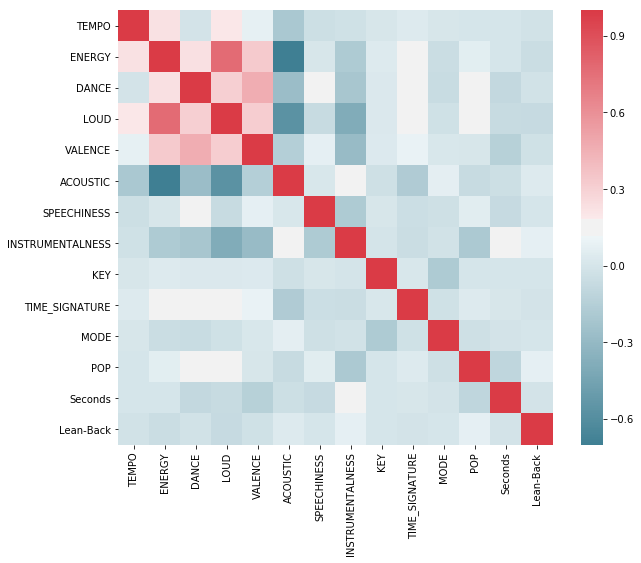

In [278]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = s.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [279]:
viralweek

,chart_type,window_type,day,track_url,artist,track,num_streams,rank_order
0,Viral 50,weekly,20180712,https://open.spotify.com/track/4B2kIC5F0kSVfTD...,Peter CottonTale,Forever Always,\N,31
1,Viral 50,weekly,20180712,https://open.spotify.com/track/1t4pPnbkOjzoA5R...,BROCKHAMPTON,1999 WILDFIRE,\N,4
2,Top 200,weekly,20180712,https://open.spotify.com/track/0tgVpDi06FyKpA1...,Ed Sheeran,Perfect,1549254,180
3,Top 200,weekly,20180712,https://open.spotify.com/track/2ekn2ttSfGqwhha...,Dua Lipa,New Rules,1594807,169
4,Top 200,weekly,20180712,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,1974470,126
5,Top 200,weekly,20180712,https://open.spotify.com/track/3a1lNhkSLSkpJE4...,Post Malone,Congratulations,2151437,110
6,Top 200,weekly,20180712,https://open.spotify.com/track/4IvenHmD0spfFDO...,Drake,After Dark,4071657,39
7,Top 200,weekly,20180712,https://open.spotify.com/track/3Yw09dj3cTXsAzl...,Drake,Talk Up,4276127,36
8,Top 200,weekly,20180712,https://open.spotify.com/track/4kWO6O1BUXcZmax...,Tiësto,Jackie Chan,4937419,24
9,Top 200,weekly,20180712,https://open.spotify.com/track/2VWbHHhWnMzKWPU...,Drake,God's Plan,8056452,11


In [299]:
v=viralweek[viralweek['rank_order']!='\\N']
viralweek[viralweek['rank_order']=='\\N']


,chart_type,window_type,day,track_url,artist,track,num_streams,rank_order
434,Top 200,weekly,20180712,\N,\N,\N,\N,\N
1889,Top 200,weekly,20180614,\N,\N,\N,\N,\N
2064,Top 200,weekly,20180906,\N,\N,\N,\N,\N
2250,Top 200,weekly,20180809,\N,\N,\N,\N,\N
2778,Top 200,weekly,20180913,\N,\N,\N,\N,\N
2863,Top 200,weekly,20180621,\N,\N,\N,\N,\N
2981,Top 200,weekly,20180823,\N,\N,\N,\N,\N
3412,Top 200,weekly,20180920,\N,\N,\N,\N,\N
3449,Top 200,weekly,20180628,\N,\N,\N,\N,\N
3882,Top 200,weekly,20180726,\N,\N,\N,\N,\N


In [300]:
v['rank_order'] = v['rank_order'].astype(int) 
v[v['track']=='Havana'].sort_values('rank_order')

/Users/preetgandhi95/miniconda3/envs/nlpclass/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,chart_type,window_type,day,track_url,artist,track,num_streams,rank_order
4967,Top 200,weekly,20180208,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,5369885,14
336,Top 200,weekly,20180201,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,5949366,15
1489,Top 200,weekly,20180222,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,4276479,24
5818,Top 200,weekly,20180215,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,4557206,25
4551,Top 200,weekly,20180301,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,4028719,31
5013,Top 200,weekly,20180308,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,3850559,33
523,Top 200,weekly,20180315,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,3692725,42
7644,Top 200,weekly,20180322,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,3390549,45
4147,Top 200,weekly,20180329,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,3295249,46
5957,Top 200,weekly,20180405,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,3113761,49


In [301]:
v['chart_type'].unique()

array(['Viral 50', 'Top 200'], dtype=object)